<a href="https://colab.research.google.com/github/chai923/AIML/blob/main/240505_AIML_lecture_ColabGoogle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Perceptron-based classification model
- A linear binary classification
- Single-layer network that makes prediction based on weighted input

Advantages of google colab:
- libraries are preinstalled
- optimized for the best performance
- good balance of library version compatibility
- fast execution
- ability to leverage GPUs

Disadvantages of google colab:
- sometimes the performance slows down depending on the network overload
- loss of information

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt #imshow = 'image show'
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

%matplotlib inline

### About the MNIST dataset
- MNIST: modified national institute of standards an technology
- It's a large database of handwritten digits used for training various image processing models
- considered to be the "hello world!" of neural networks (NN)
- It consists of black and white only (grayscale) representation of 28x28 pixel bounding box (image)
- the dataset is a flattened representation of these images
- we have 28x28 pixels = 784 pixels flattened (columns)
each pixel has a value from 0 to 255  

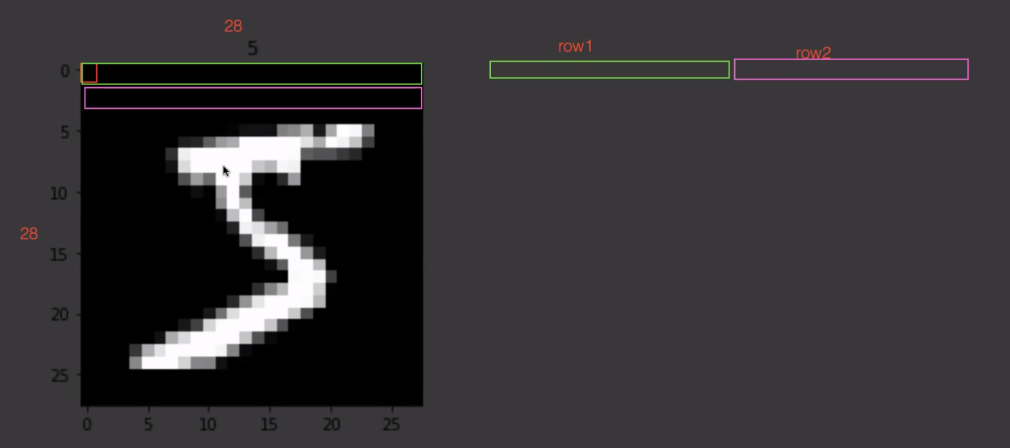

In [ ]:
df = pd.read_csv('mnist_train.csv')

In [ ]:
df.max().max()

255

In [ ]:
df.shape

(60000, 785)

In [ ]:
df.head()
#28x28 is the grapyscale value of the last pixel i.e the most bottom right pixel
#0 means the absense of light i.e. black so likely represents the black background

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
print(df.iloc[0])

label    5
1x1      0
1x2      0
1x3      0
1x4      0
        ..
28x24    0
28x25    0
28x26    0
28x27    0
28x28    0
Name: 0, Length: 785, dtype: int64


In [ ]:
#split the data
x = df.drop(columns = 'label')
y = df['label']

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=4)

In [ ]:
model_per = Perceptron() #default hyperparameters

In [ ]:
#train the model
model_per.fit(x_train,y_train)

Perceptron()

In [ ]:
#get the predicted output
y_pred = model_per.predict(x_test)
y_pred

array([2, 7, 6, ..., 6, 4, 2])

In [ ]:
accuracy = accuracy_score(y_test,y_pred)
print(f'Perceptron model accuracy: {accuracy}')

Perceptron model accuracy: 0.8745


This uses just one perceptron, and we can get away with it because the images are poorly rendered (like the '5' in the above image).

we'll need more perceptrons as we do higher quality images.

Let's see how our perceptron model is good at predictions.

In [ ]:
#get a sample of images: 4 images of the number 5
digit = 5 #this is the digit we're trying to evaluate
sample_size = 4

mask = df['label']==digit
#convert the flattened data into a 2d image for plotting purposes aka reshape
#28 comes from squareroot of 784 i.e. number of columns this only works when the image is a square vs rectangle though
sample_images = df[mask].drop(columns='label',axis=1).head(sample_size).values.reshape(sample_size,28,28) #.values turns it into an array

sample_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

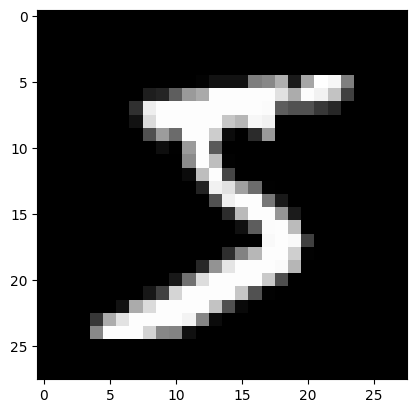

In [ ]:
plt.imshow(sample_images[0],cmap='gray')


AxesImage(size=(28, 28))


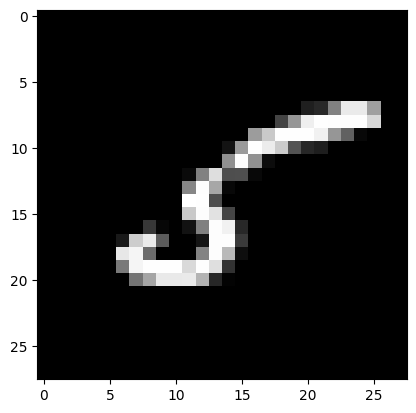

In [ ]:
print(plt.imshow(sample_images[1],cmap='gray'))


AxesImage(size=(28, 28))


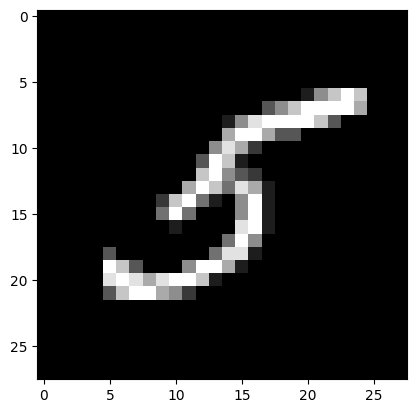

In [ ]:
print(plt.imshow(sample_images[2],cmap='gray'))

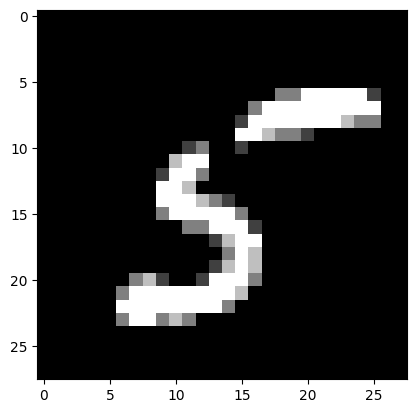

In [ ]:
for i in range(sample_size):
  plt.imshow(sample_images[i],cmap='gray') #imshow is from matplotlib and it takes numeric picture data and plots the image


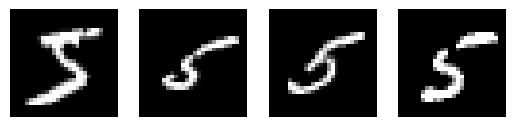

In [ ]:
for i in range(sample_size):
  plt.subplot(1,sample_size,i+1)
  plt.imshow(sample_images[i],cmap='gray')
  plt.axis("off")

<Axes: xlabel='label'>

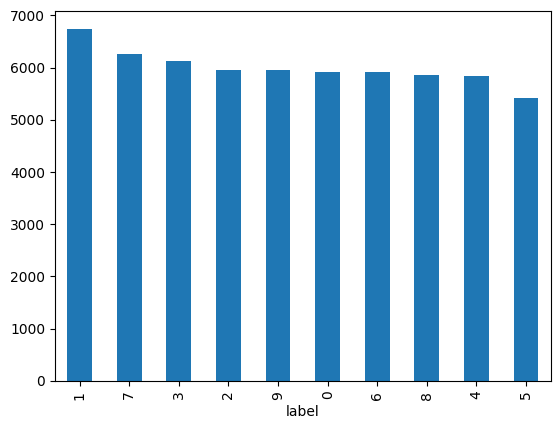

In [ ]:
df['label'].value_counts().plot(kind='bar')

# Apples to apples comparison

In [ ]:
num_samples = 20
sample_images = x.head(num_samples).values.reshape(num_samples,28,28)
sample_labels = model_per.predict(x.head(num_samples))

In [ ]:
np.shape(sample_images)

(20, 28, 28)

In [ ]:
np.shape(sample_labels)

(20,)

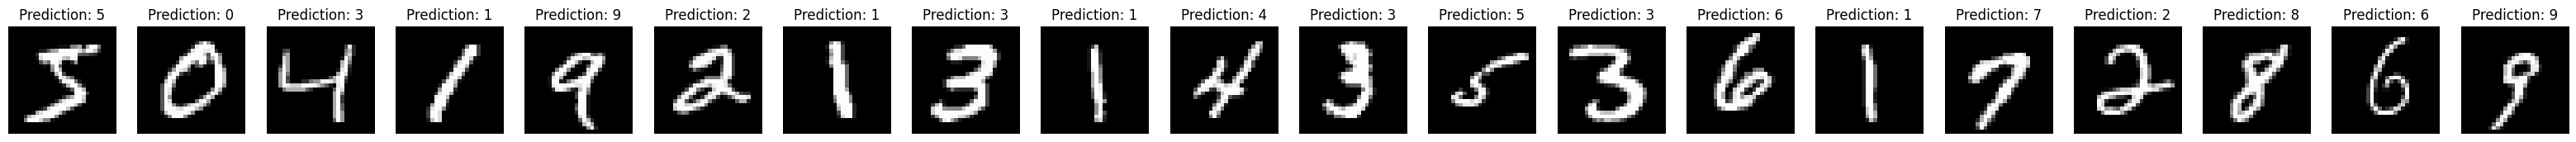

In [ ]:
plt.figure(figsize=(num_samples*2,2)) #40 by 2

for i in range(num_samples):
  plt.subplot(1,num_samples,i+1)
  plt.imshow(sample_images[i],cmap='gray')
  #add the predicted labels on top of the image
  plt.title('Prediction: {}'.format(sample_labels[i]))
  plt.axis('off')